# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [18]:
def f(x) :
    return (np.exp(x)* (np.log(x)))

In [25]:
import pandas as pd 

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns = ["Aproximación", "Aproximación2"], index = N)
table

,Aproximación,Aproximación2
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [26]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)) * (b-a)

for i in N :
    table.loc[i, "Aproximación"] = montecarlo(f, int(i), 1, 3)
table

,Aproximación,Aproximación2
10.0,8.80362,NaN
100.0,13.31283,NaN
1000.0,14.04298,NaN
10000.0,14.026017,NaN
100000.0,14.029212,NaN


In [29]:
from math import e
ln = np.log

def f(x) :
    return (np.sin(x)*ln(e))

def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)) * (b-a)

for i in N :
    table.loc[i, "Aproximación2"] = montecarlo(f, int(i), 1, 3)
table

,Aproximación,Aproximación2
10.0,8.80362,1.582288
100.0,13.31283,1.538239
1000.0,14.04298,1.535088
10000.0,14.026017,1.537211
100000.0,14.029212,1.531876


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [31]:
def f1(x) :
    return (x**2 + 2*(y**2))
def f2(x) :
    return (-2*x + 8*y - 7)


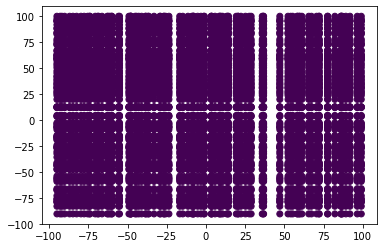

In [43]:
def bernoulli(x, y) :
    return (x**2 + 2*y**2) <= (-2*x + 8*y - 7)
x = np.random.uniform(-100, 100, 100)
y = np.random.uniform(-100, 100, 100)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c= bernoulli(X, Y))

In [42]:
def montecarlo2(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B) * AR

def R(x, y) :
    return ((x**2 + 2*y**2)<=(-2*x + 8*y - 7))

montecarlo2(R, -1, 1, -1, 1, 10000)

0.0

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Se puede utilizar para predecir los riesgos de alguna inversión así como la gravedad de el mismo

Son utiles cuando el proyecto el cual se analiza tiene un gran numero de dimensiones y por tanto las integrales numéricas no son una opción

Para calcular la tasa interna de retornos y evaluar la rentabilidad de alguna inversión o proyecto